In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# cluster 1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# cluster 2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# cluster 3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1, x2, x3), axis=0)
y = np.concatenate((y1, y2, y3), axis=0)

dictionary = {"x":x,"y":y}
data = pd.DataFrame(dictionary)
data.head()

,x,y
0,26.831545,19.018643
1,25.745819,34.827271
2,34.354411,21.871030
3,30.339005,22.862861
4,28.906864,31.383221


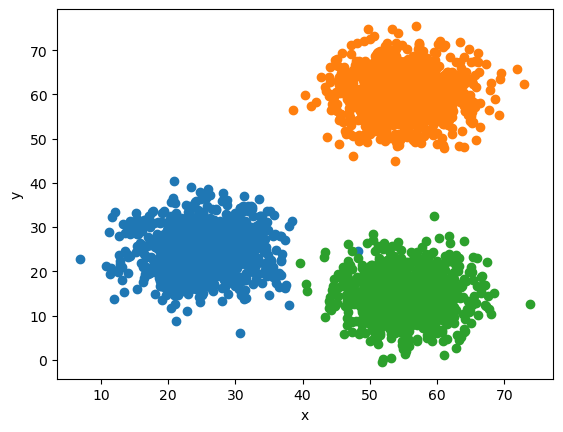

In [6]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

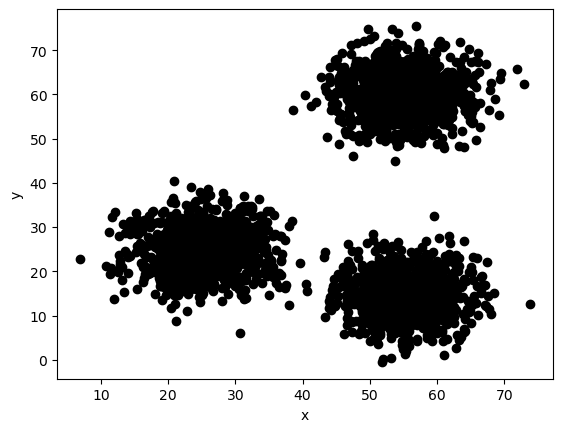

In [7]:
# this type of data is needed for K-average cluster method
plt.figure()
plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.scatter(x3,y3,color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

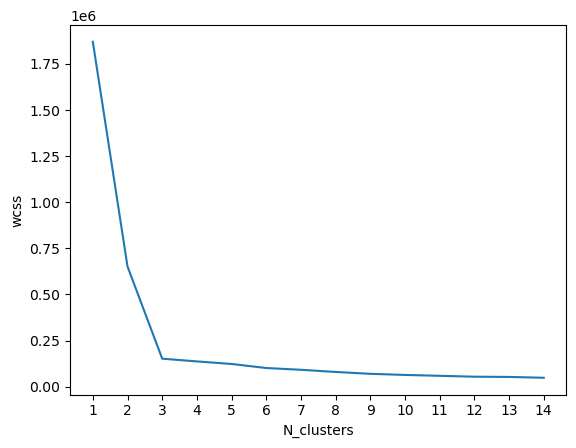

In [8]:
# to find K value
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("N_clusters")
plt.ylabel("wcss")
plt.show()

When k value is 3, it is the best here since x = 3 has a SHARP EDGE!!

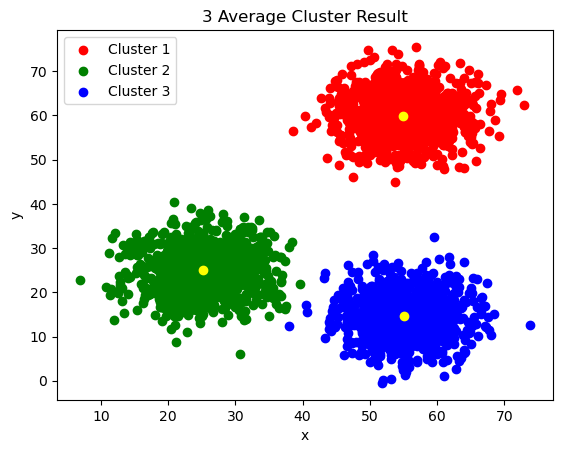

In [11]:
k_mean = KMeans(n_clusters= 3)
clusters = k_mean.fit_predict(data)

data["label"] = clusters

plt.figure()
plt.scatter(data.x[data.label==0],data.y[data.label==0],color="red",label="Cluster 1")
plt.scatter(data.x[data.label==1],data.y[data.label==1],color="green",label="Cluster 2")
plt.scatter(data.x[data.label==2],data.y[data.label==2],color="blue",label="Cluster 3")
plt.scatter(k_mean.cluster_centers_[:,0],k_mean.cluster_centers_[:,1],color="yellow")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3 Average Cluster Result")
plt.show()

# Hierarcial Clustering

In [17]:
# cluster 1
x11 = np.random.normal(25,5,20)
y11 = np.random.normal(25,5,20)

# cluster 2
x22 = np.random.normal(55,5,20)
y22 = np.random.normal(60,5,20)

# cluster 3
x33 = np.random.normal(55,5,20)
y33 = np.random.normal(15,5,20)

xn = np.concatenate((x11, x22, x33), axis=0)
yn = np.concatenate((y11, y22, y33), axis=0)

dictionary2 = {"x":xn,"y":yn}
data2 = pd.DataFrame(dictionary2)
data2.head()

,x,y
0,23.972849,20.896284
1,22.590678,30.330265
2,33.691425,29.116597
3,24.219618,31.053072
4,23.454670,29.167678


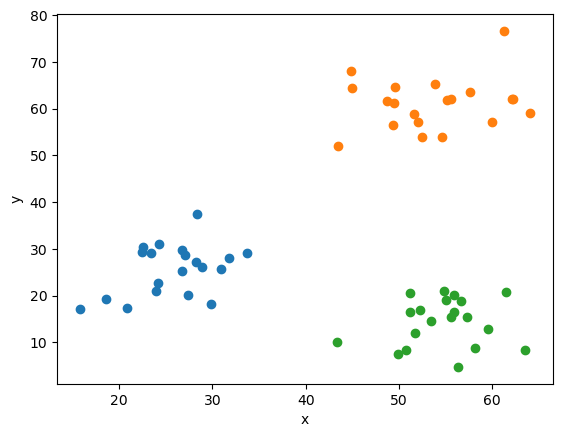

In [18]:
plt.figure()
plt.scatter(x11,y11)
plt.scatter(x22,y22)
plt.scatter(x33,y33)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

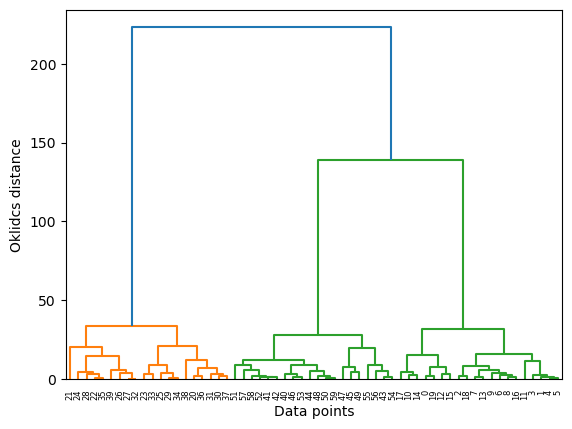

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data2,method="ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("Data points")
plt.ylabel("Oklidcs distance")
plt.show()

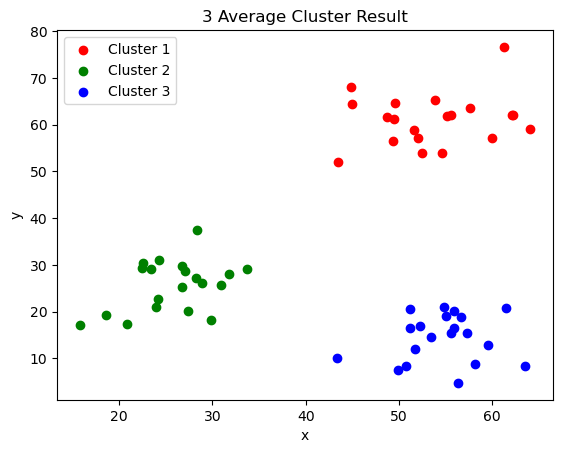

In [29]:
from sklearn.cluster import AgglomerativeClustering
hie_clus = AgglomerativeClustering(n_clusters = 3,linkage="ward")
clusts = hie_clus.fit_predict(data2)
data2["label"] = clusts

plt.figure()
plt.scatter(data2.x[data2.label==0],data2.y[data2.label==0],color="red",label="Cluster 1")
plt.scatter(data2.x[data2.label==1],data2.y[data2.label==1],color="green",label="Cluster 2")
plt.scatter(data2.x[data2.label==2],data2.y[data2.label==2],color="blue",label="Cluster 3")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3 Average Cluster Result")
plt.show()